# Linear Regresion with Pytorch

**Steps**
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - Forward pass: compute predictions
   - backward pass: gradients
   - update weights 

In [11]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Prepare data

In [12]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [13]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [14]:
print(y.shape)
y = y.view(y.shape[0],1)
print(y.shape)

torch.Size([100])
torch.Size([100, 1])


In [15]:
n_samples, n_features = X.shape

## 2. Model

In [17]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

## 3. loss and optimizer

In [19]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 4. training loop

In [22]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if (epoch +1) % 10 ==0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

epoch: 10, loss: 4352.8540
epoch: 20, loss: 3247.4395
epoch: 30, loss: 2447.9004
epoch: 40, loss: 1868.9672
epoch: 50, loss: 1449.3466
epoch: 60, loss: 1144.9128
epoch: 70, loss: 923.8561
epoch: 80, loss: 763.2131
epoch: 90, loss: 646.3871
epoch: 100, loss: 561.3694


<function matplotlib.pyplot.show(close=None, block=None)>

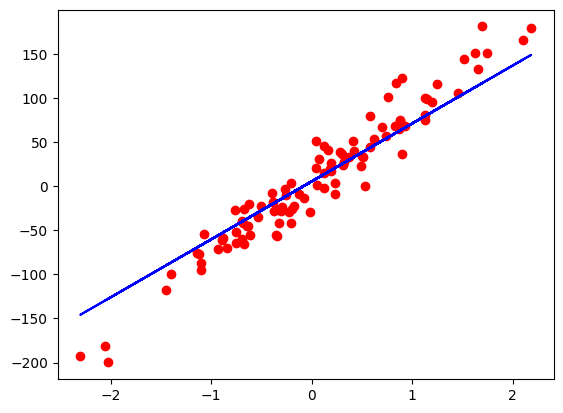

In [23]:
# plot
predicted = model(X).detach().numpy() # detach to prevent the opearation to being track from computational graph 
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show